# Houses and Empty Lots for Sale in New Brunswick (as of June 12, 2020)

In this project, I scraped data from this [website](https://www.point2homes.com/CA/Real-Estate-Listings/NB.html) which lists houses and 
empty lots for sale. The selling price is listed along with the lot size. For houses, the number of bedrooms, bathrooms, the house size the house type are also given.

## 1.1 The Test Set

The feature engineering from the training set will be applied here.


In [1]:
# load libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import re
from tqdm.notebook import tqdm

val = pd.read_csv('val.csv')

# look at first 5 rows of training set
val.head(5)

,Address,Beds,Baths,House Size (sqft),Lot Size (ac),Type,Postal Code,Price
0,"92 Marks Street, St. Stephen, New Brunswick",3.0,1.0,NaN,NaN,Residential,E3L2B5,99000
1,"400 East Glassvile Road, Glassville, New Bruns...",3.0,2.0,NaN,NaN,Family,E7L1W1,189000
2,"Lot 6 Upper Durham Road, Upper Durham, New Bru...",NaN,NaN,NaN,1.0,Empty Land,E6C1B3,16700
3,"42 Laforest - Spring 2020, Shediac, New Brunsw...",3.0,1.0,1488.0,NaN,Residential,E4P 0R8,255000
4,"258 Royree Road, Western Charlotte, New Brunswick",2.0,1.0,NaN,NaN,Residential,E3L5S4,115000


In [2]:
# get summary statistics
val.describe()

,Beds,Baths,House Size (sqft),Lot Size (ac),Price
count,62.000000,63.000000,46.000000,26.000000,95.000000
mean,3.435484,1.857143,1720.565217,6.882423,175532.589474
std,1.018211,0.858678,871.830964,18.687162,138624.939926
min,2.000000,1.000000,572.000000,0.110000,9900.000000
25%,3.000000,1.000000,1232.000000,0.797500,82450.000000
50%,3.000000,2.000000,1512.000000,1.355000,139900.000000
75%,4.000000,2.000000,2053.000000,6.012500,229950.000000
max,6.000000,5.000000,5720.000000,95.880000,715500.000000


In [3]:
# get unique postal codes
len(val['Postal Code'].unique())

94

There are a lot of postal codes. To reduce the variability of postal codes, we just get the first half of the postal code.

In [4]:
val['Postal'] = val['Postal Code'].str[:3]
val.head(5)

,Address,Beds,Baths,House Size (sqft),Lot Size (ac),Type,Postal Code,Price,Postal
0,"92 Marks Street, St. Stephen, New Brunswick",3.0,1.0,NaN,NaN,Residential,E3L2B5,99000,E3L
1,"400 East Glassvile Road, Glassville, New Bruns...",3.0,2.0,NaN,NaN,Family,E7L1W1,189000,E7L
2,"Lot 6 Upper Durham Road, Upper Durham, New Bru...",NaN,NaN,NaN,1.0,Empty Land,E6C1B3,16700,E6C
3,"42 Laforest - Spring 2020, Shediac, New Brunsw...",3.0,1.0,1488.0,NaN,Residential,E4P 0R8,255000,E4P
4,"258 Royree Road, Western Charlotte, New Brunswick",2.0,1.0,NaN,NaN,Residential,E3L5S4,115000,E3L


In [5]:
# get number if unique 'Postal'
len(val.Postal.unique())

50

Ninety is not that bad. Now we check the histogram of **Postal**.

/Users/renzoflores/anaconda3/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 7'. Pick better value with 'binwidth'.


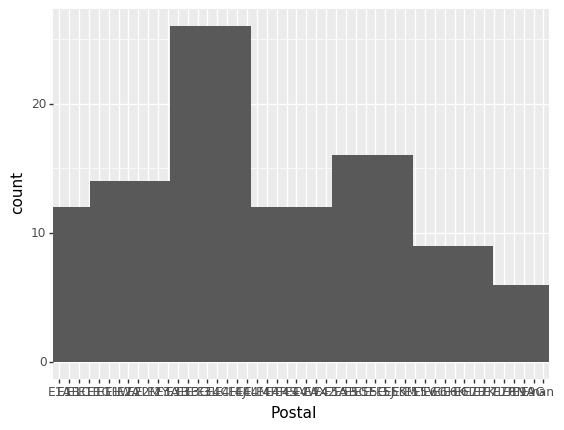

<ggplot: (7009328665)>

In [6]:
from plotnine import *

ggplot(val, aes(x='Postal')) + geom_histogram()

In [7]:
# get minimum counts for postal
val.Postal.value_counts()

E3L    13
E5B     7
E1B     5
E1A     5
E4J     4
E2A     4
E3A     3
E3B     3
E4P     3
E5E     2
E5V     2
E3G     2
E4V     2
E2L     2
E5A     2
E4Z     2
E4R     1
E6L     1
E1G     1
E4X     1
E7K     1
E4W     1
E7L     1
E5J     1
E9A     1
E4M     1
E9G     1
E5G     1
E5K     1
E6H     1
E4C     1
E1E     1
E2Y     1
E4S     1
E3E     1
E5T     1
E1C     1
E1W     1
E4H     1
E5M     1
E6C     1
E5C     1
E1H     1
E7P     1
E2M     1
E7B     1
E6K     1
E4L     1
E8N     1
Name: Postal, dtype: int64

Okay, so there are plenty of postal codes with only ones in them. So we just pick the first two characters of the postal code instead.

In [8]:
val['Postal'] = val['Postal'].str[:-1]
val.Postal.value_counts()

E3    22
E5    19
E4    19
E1    15
E2     8
E6     4
E7     4
E9     2
E8     1
Name: Postal, dtype: int64

Much better. We can now drop the postal code.

In [9]:
val.drop('Postal Code',axis=1,inplace=True)
val.head(5)

,Address,Beds,Baths,House Size (sqft),Lot Size (ac),Type,Price,Postal
0,"92 Marks Street, St. Stephen, New Brunswick",3.0,1.0,NaN,NaN,Residential,99000,E3
1,"400 East Glassvile Road, Glassville, New Bruns...",3.0,2.0,NaN,NaN,Family,189000,E7
2,"Lot 6 Upper Durham Road, Upper Durham, New Bru...",NaN,NaN,NaN,1.0,Empty Land,16700,E6
3,"42 Laforest - Spring 2020, Shediac, New Brunsw...",3.0,1.0,1488.0,NaN,Residential,255000,E4
4,"258 Royree Road, Western Charlotte, New Brunswick",2.0,1.0,NaN,NaN,Residential,115000,E3


/Users/renzoflores/anaconda3/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 11'. Pick better value with 'binwidth'.


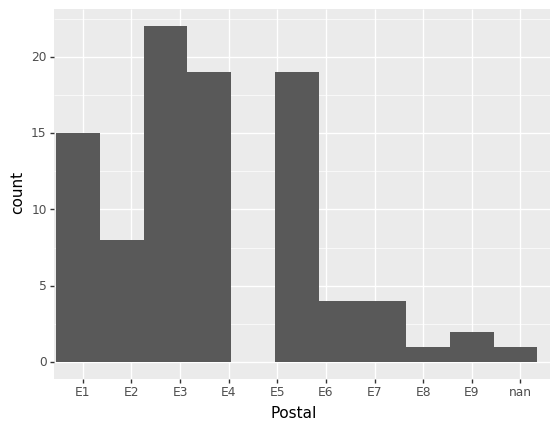

<ggplot: (7009967093)>

In [10]:
# check histogram for Postal
ggplot(val, aes(x='Postal')) + geom_histogram()

In [12]:
val[val.Postal.isnull()]

,Address,Beds,Baths,House Size (sqft),Lot Size (ac),Type,Price,Postal
9,"642 Charters Settlement Road, Greater New Mary...",4.0,1.0,NaN,NaN,Family,224900,NaN


According to Wikipedia and some searching in Google, Greater New Maryland has a postal code starting with E3.

In [14]:
val.loc[9,'Postal'] = 'E3'
val.loc[9,:]

Address              642 Charters Settlement Road, Greater New Mary...
Beds                                                                 4
Baths                                                                1
House Size (sqft)                                                  NaN
Lot Size (ac)                                                      NaN
Type                                                            Family
Price                                                           224900
Postal                                                              E3
Name: 9, dtype: object

We can also drop the addresses now since we have the postal codes. 

In [15]:
val.drop('Address',axis=1, inplace=True)

In [16]:
val.head(5)

,Beds,Baths,House Size (sqft),Lot Size (ac),Type,Price,Postal
0,3.0,1.0,NaN,NaN,Residential,99000,E3
1,3.0,2.0,NaN,NaN,Family,189000,E7
2,NaN,NaN,NaN,1.0,Empty Land,16700,E6
3,3.0,1.0,1488.0,NaN,Residential,255000,E4
4,2.0,1.0,NaN,NaN,Residential,115000,E3


We now look at the distributions of beds and baths.

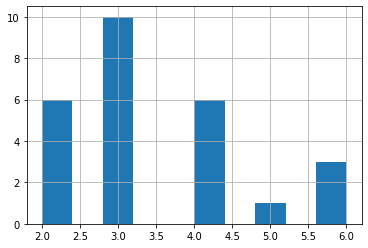

In [17]:
val[val['Type']=='Residential']['Beds'].hist()

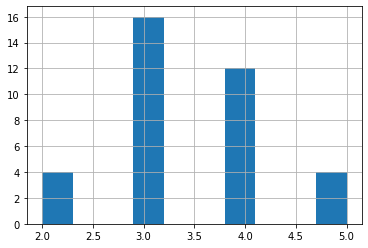

In [18]:
val[val['Type']=='Family']['Beds'].hist()

The distribution is slightly skewed to the right for both types, indicating that most houses typically have ~3 beds. Now, if the type is Empty Land, obviously there are no beds, so we set Beds = 0, and we impute the beds with the median number. We also add a column indicating missingness of beds.

In [19]:
# check the median
beds_resid_impute = val[val['Type']=='Residential']['Beds'].median(skipna=True)
print(beds_resid_impute)
beds_fam_impute = val[val['Type']=='Family']['Beds'].median(skipna=True)
print(beds_fam_impute)

3.0
3.0


In [20]:
# for residential and family houses, the median number of beds are essentially the same.
# now I'm thinking of just joining Residential and Family.

val = val.replace('Family','Residential')
val['Type'].unique()

array(['Residential', 'Empty Land'], dtype=object)

In [22]:
val['Missing Beds'] = 0
val.head(5)

for ind, typ in tqdm(val['Type'].items(), total = len(val['Type'])):
    if typ == 'Empty Land':
        val.loc[ind,'Beds'] = 0
    elif np.isnan(val.loc[ind,'Beds']):
        val.loc[ind,'Beds'] = beds_fam_impute
        val.loc[ind,'Missing Beds'] = 1

val.head(5)

,Beds,Baths,House Size (sqft),Lot Size (ac),Type,Price,Postal,Missing Beds
0,3.0,1.0,NaN,NaN,Residential,99000,E3,0
1,3.0,2.0,NaN,NaN,Residential,189000,E7,0
2,0.0,NaN,NaN,1.0,Empty Land,16700,E6,0
3,3.0,1.0,1488.0,NaN,Residential,255000,E4,0
4,2.0,1.0,NaN,NaN,Residential,115000,E3,0


We do the same thing for baths.

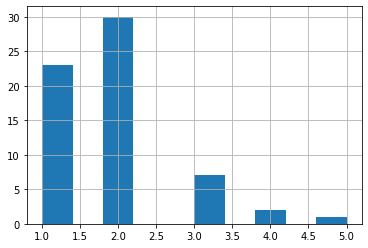

In [23]:
val['Baths'].hist()

In [25]:
baths_impute = val['Baths'].median(skipna=True)
val['Missing Baths'] = 0

for ind, typ in tqdm(val['Type'].items(), total = len(val['Type'])):
    if typ == 'Empty Land':
        val.loc[ind,'Baths'] = 0
    elif np.isnan(val.loc[ind,'Baths']):
        val.loc[ind,'Baths'] = baths_impute
        val.loc[ind,'Missing Baths'] = 1

val.head(5)

,Beds,Baths,House Size (sqft),Lot Size (ac),Type,Price,Postal,Missing Beds,Missing Baths
0,3.0,1.0,NaN,NaN,Residential,99000,E3,0,0
1,3.0,2.0,NaN,NaN,Residential,189000,E7,0,0
2,0.0,0.0,NaN,1.0,Empty Land,16700,E6,0,0
3,3.0,1.0,1488.0,NaN,Residential,255000,E4,0,0
4,2.0,1.0,NaN,NaN,Residential,115000,E3,0,0


Perhaps if we combine the number of bedrooms and the number of bathrooms into rooms it could probably help with the learning algorithm, and so we create one.

In [26]:
val['Rooms'] = val['Beds'] + val['Baths']
val.head(5)

,Beds,Baths,House Size (sqft),Lot Size (ac),Type,Price,Postal,Missing Beds,Missing Baths,Rooms
0,3.0,1.0,NaN,NaN,Residential,99000,E3,0,0,4.0
1,3.0,2.0,NaN,NaN,Residential,189000,E7,0,0,5.0
2,0.0,0.0,NaN,1.0,Empty Land,16700,E6,0,0,0.0
3,3.0,1.0,1488.0,NaN,Residential,255000,E4,0,0,4.0
4,2.0,1.0,NaN,NaN,Residential,115000,E3,0,0,3.0


Now we check the house size and lot size.

/Users/renzoflores/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:369: PlotnineWarning: stat_density : Removed 25 rows containing non-finite values.


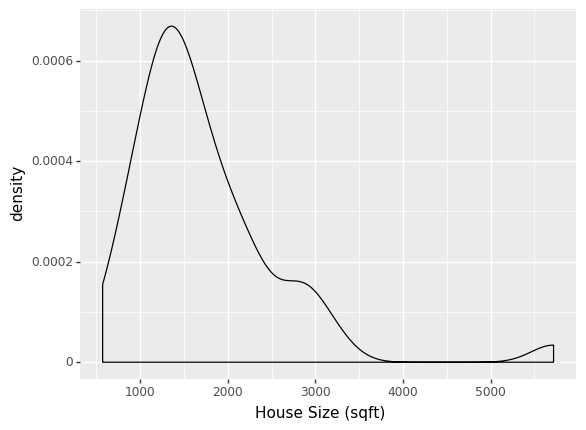

<ggplot: (7010388637)>

In [27]:
df = val[val['Type'] == 'Residential']
ggplot(df, aes(x='House Size (sqft)')) + geom_density()

/Users/renzoflores/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:369: PlotnineWarning: stat_density : Removed 16 rows containing non-finite values.


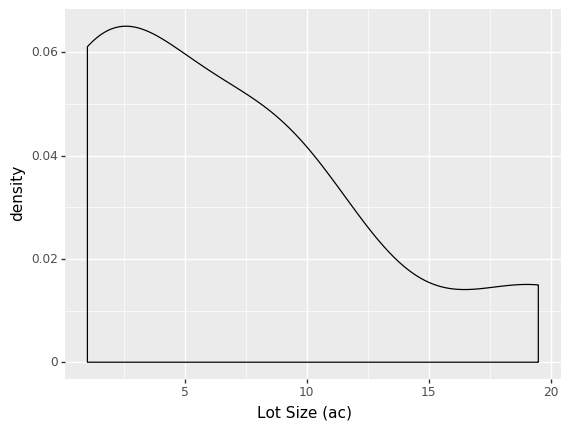

<ggplot: (7010380205)>

In [28]:
df = val[val['Type'] == 'Empty Land']
ggplot(df, aes(x='Lot Size (ac)')) + geom_density()

/Users/renzoflores/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:369: PlotnineWarning: stat_density : Removed 53 rows containing non-finite values.


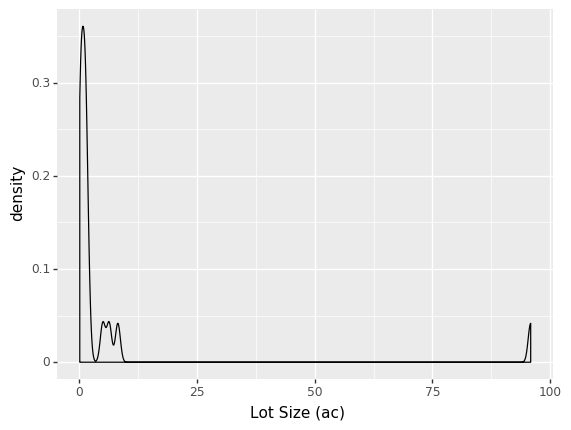

<ggplot: (7010388597)>

In [29]:
df = val[val['Type'] == 'Residential']
ggplot(df, aes(x='Lot Size (ac)')) + geom_density()

Once again, all distributions are skewed to the right, so we impute with their median.

In [32]:
val['Missing House'] = 0
val['Missing Land'] = 0

for ind, typ in tqdm(val['Type'].items(), total=len(val['Type'])):
    if typ == 'Empty Land':
        val.loc[ind,'House Size (sqft)'] = 0
        
        if np.isnan(val.loc[ind,'Lot Size (ac)']):
            val.loc[ind,'Lot Size (ac)'] = val[val['Type'] == typ]['Lot Size (ac)'].median(skipna=True)
            val.loc[ind,'Missing Land'] = 1
            
    elif typ == 'Residential':
        
        if np.isnan(val.loc[ind,'House Size (sqft)']):
            val.loc[ind, 'House Size (sqft)'] = val[val['Type'] == typ]['House Size (sqft)'].median(skipna=True)
            val.loc[ind, 'Missing House'] = 1
        
        if np.isnan(val.loc[ind,'Lot Size (ac)']):
            val.loc[ind,'Lot Size (ac)'] = val[val['Type'] == typ]['Lot Size (ac)'].median(skipna=True)
            val.loc[ind, 'Missing Land'] = 1

In [33]:
val.head(5)

,Beds,Baths,House Size (sqft),Lot Size (ac),Type,Price,Postal,Missing Beds,Missing Baths,Rooms,Missing House,Missing Land
0,3.0,1.0,1512.0,1.16,Residential,99000,E3,0,0,4.0,0,1
1,3.0,2.0,1512.0,1.16,Residential,189000,E7,0,0,5.0,1,1
2,0.0,0.0,0.0,1.00,Empty Land,16700,E6,0,0,0.0,0,0
3,3.0,1.0,1488.0,1.16,Residential,255000,E4,0,0,4.0,0,1
4,2.0,1.0,1512.0,1.16,Residential,115000,E3,0,0,3.0,1,1


In [34]:
# save file
val.to_csv('val_cleaned.csv',index=False)